In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [7]:
df = pd.read_csv('SHOP-SALES.csv')

In [8]:
print(df.shape)
print(df.columns.values)
print(df.info())
print(df.head())
print(df.dtypes)

(9999, 11)
['Date' 'HOUR' 'GENDER' 'PRODUCT' 'COLOR' 'SIZE' 'SALE CONSULTANT'
 'QUANTITY' 'PRICE' 'VAT' 'TOTAL']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             9999 non-null   object 
 1   HOUR             9999 non-null   object 
 2   GENDER           9999 non-null   object 
 3   PRODUCT          9999 non-null   object 
 4   COLOR            9999 non-null   int64  
 5   SIZE             9999 non-null   object 
 6   SALE CONSULTANT  9999 non-null   object 
 7   QUANTITY         9999 non-null   int64  
 8   PRICE            9999 non-null   float64
 9   VAT              9999 non-null   float64
 10  TOTAL            9999 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 859.4+ KB
None
       Date         HOUR GENDER            PRODUCT  COLOR SIZE  \
0  6/1/2020  10:21:00 AM    MEN            T SH

In [9]:
print(df["QUANTITY"].unique())

[1]


In [10]:
df = df.drop(["Date","HOUR","PRICE","QUANTITY","SALE CONSULTANT"], axis=1)
print(df.head())

  GENDER            PRODUCT  COLOR SIZE   VAT  TOTAL
0    MEN            T SHIRT   2160   XS  2.96     40
1  WOMEN  SHIRT LONG SLEEVE   2550   40  5.92     80
2    MEN  SHIRT LONG SLEEVE    900  45X  5.92     80
3  WOMEN      KNIT TROUSERS    600   XL  3.70     50
4    MEN  SHIRT LONG SLEEVE   1800  39X  6.58     89


MEN      5228
WOMEN    2518
BOYS     1618
GIRLS     634
Erkek       1
Name: GENDER, dtype: int64
  GENDER            PRODUCT  COLOR SIZE   VAT  TOTAL
0      1            T SHIRT   2160   XS  2.96     40
1      2  SHIRT LONG SLEEVE   2550   40  5.92     80
2      1  SHIRT LONG SLEEVE    900  45X  5.92     80
3      2      KNIT TROUSERS    600   XL  3.70     50
4      1  SHIRT LONG SLEEVE   1800  39X  6.58     89


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


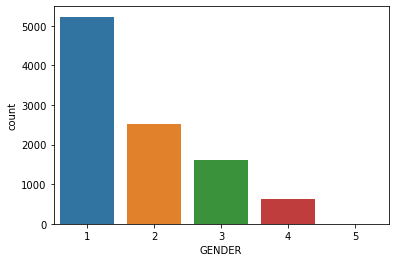

In [11]:
print(df["GENDER"].value_counts())
df.loc[df["GENDER"] == "MEN","GENDER"] = 1
df.loc[df["GENDER"] == "WOMEN","GENDER"] = 2
df.loc[df["GENDER"] == "BOYS","GENDER"] = 3
df.loc[df["GENDER"] == "GIRLS","GENDER"] = 4
df.loc[df["GENDER"] == "Erkek","GENDER"] = 5
print(df.head())
sns.countplot(df["GENDER"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


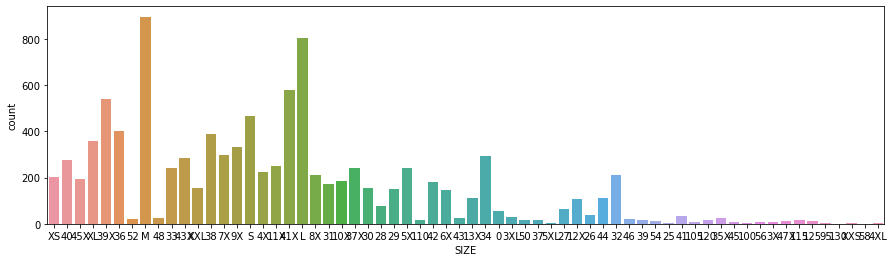

In [12]:
plt.figure(figsize=(15,4))
sns.countplot(df["SIZE"])
plt.show()

In [13]:
print(df["COLOR"].value_counts().sort_values(ascending=False))

600     2003
1800     952
1050     730
900      618
2550     611
        ... 
1053       1
1713       1
2403       1
1026       1
1806       1
Name: COLOR, Length: 91, dtype: int64


In [14]:
print(df["PRODUCT"].value_counts().sort_values(ascending=False))

SHIRT LONG SLEEVE     3105
T SHIRT               2907
DENIM PANTS           1168
CHINOS                 644
KNIT TROUSERS          530
SHOES                  329
SHIRT SHORT SLEEVE     258
TROUSERS               145
VOWEN SPORT PANTS      137
DENIM SKIRT            114
BELT                   101
WOVEN CAPRI             90
KNITTED SHORTS          86
WOVEN SKIRT             77
WOVEN DRESS             66
BOTTOM UNDERWEAR        55
PYJAMAS                 35
SPORT SKIRT             32
SEA SHORT               28
UNDERWEAR               15
SPORT BAG               14
DENIM BERMUDA           13
CAP                     12
DENIM SHORT             11
JACKET                   9
MEN PYJAMAS              6
LUGGAGE TRAVEL BAG       4
FLIP FLOPS               3
SHIRT TUXEDO             2
DENIM DRESS              1
KNITTED SKIRT            1
LADIES LEGGINGS          1
Name: PRODUCT, dtype: int64


In [15]:
La = LabelEncoder()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


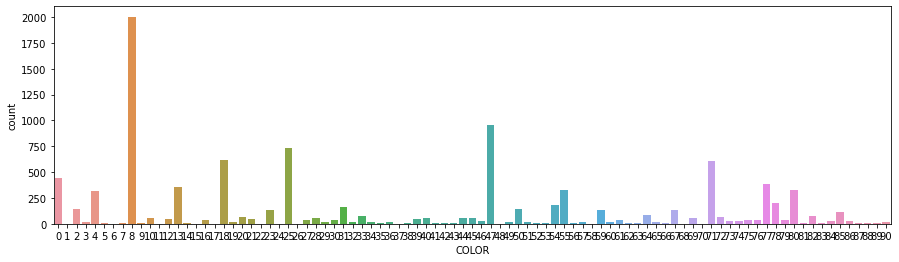

In [16]:
plt.figure(figsize=(15,4))
df["COLOR"] = La.fit_transform(df["COLOR"])
sns.countplot(df["COLOR"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


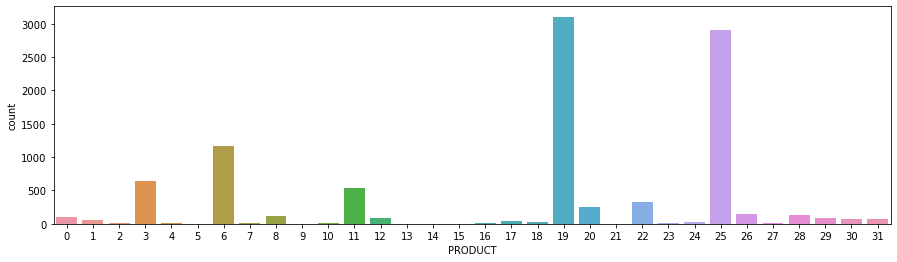

In [17]:
plt.figure(figsize=(15,4))
df["PRODUCT"] = La.fit_transform(df["PRODUCT"])
sns.countplot(df["PRODUCT"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


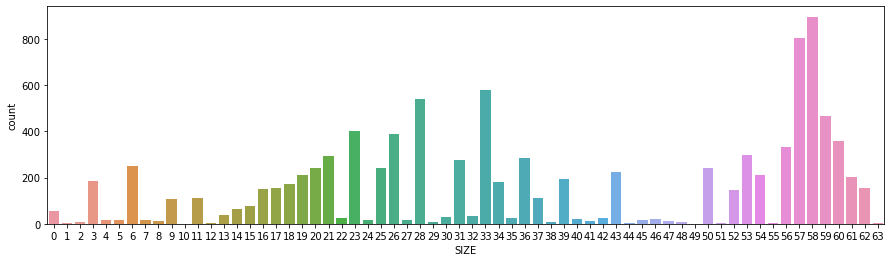

In [18]:
plt.figure(figsize=(15,4))
df["SIZE"] = La.fit_transform(df["SIZE"])
sns.countplot(df["SIZE"])
plt.show()

In [19]:
print(df.dtypes)
print(df.head())
print(df.isnull().sum())

GENDER      object
PRODUCT      int32
COLOR        int64
SIZE         int32
VAT        float64
TOTAL        int64
dtype: object
  GENDER  PRODUCT  COLOR  SIZE   VAT  TOTAL
0      1       25     55    61  2.96     40
1      2       19     71    31  5.92     80
2      1       19     18    39  5.92     80
3      2       11      8    60  3.70     50
4      1       19     47    28  6.58     89
GENDER     0
PRODUCT    0
COLOR      0
SIZE       0
VAT        0
TOTAL      0
dtype: int64


In [20]:
x = df.drop("TOTAL",axis=1)
y = df["TOTAL"]
print(x.shape)
print(y.shape)

(9999, 5)
(9999,)


In [21]:
ss = StandardScaler()
x = ss.fit_transform(x)
print(x[:5])

[[-0.81457246  0.90686813  0.71253409  1.28608297 -0.5358405 ]
 [ 0.24873172  0.14552073  1.29899867 -0.39648672  0.90789786]
 [-0.81457246  0.14552073 -0.64366526  0.05219853  0.90789786]
 [ 0.24873172 -0.86960914 -1.01020563  1.22999732 -0.17490591]
 [-0.81457246  0.14552073  0.41930179 -0.56474369  1.2298125 ]]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=44, shuffle =True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6699, 5)
(6699,)
(3300, 5)
(3300,)


In [24]:
Ln = LinearRegression()
Ln.fit(X_train, y_train)

print("_"*100)
print(Ln.score(X_train, y_train))
print(Ln.score(X_test, y_test))
print("_"*100)

____________________________________________________________________________________________________
0.798817440282895
0.7673753639041857
____________________________________________________________________________________________________


In [25]:
Rf = RandomForestRegressor(n_estimators=10,max_depth=15, random_state=33)
Rf.fit(X_train,y_train)

print("_"*100)
print(Rf.score(X_train, y_train))
print(Rf.score(X_test, y_test))
print("_"*100)

____________________________________________________________________________________________________
0.9848284751857883
0.9637529204054865
____________________________________________________________________________________________________


In [26]:
y_pred = Rf.predict(X_test)
print(y_pred[:5])

[90. 30. 50. 60. 60.]


In [27]:
result = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
# result.to_csv("result.csv",index=False)